<a href="https://colab.research.google.com/github/dfloros/DF_LabScripts/blob/master/ChemSpiPy_rdkit_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chemspipy
!pip install condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge rdkit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for chemspipy: filename=ChemSpiPy-2.0.0-py3-none-any.whl size=15095 sha256=ad571bf0aef90ad51c0d4f0019a5680f50771a2f5afcff8f8c367c4ae561ef69
  Stored in directory: /root/.cache/pip/wheels/95/af/25/c21152c70e18a8b5f8d1e8cd26ddc09e6dca159d403b495a2a
Successfully built chemspipy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:35
🔁 Restarting kernel...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / 

In [ ]:
 from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import pandas as pd
import rdkit as rd
import numpy as np
import rdkit.Chem.SaltRemover
import rdkit.Chem.SaltRemover
import rdkit.Chem.Descriptors
import rdkit.Chem.rdchem
from chemspipy import ChemSpider

import ast
import time

import asyncio


cs = ChemSpider('bqQaG2wiLGYre44EyrEFUjVn3RWuHPFm')



In [ ]:
def clean_smiles(sm, verbose = False):
    if sm == None:
      return ''
    remover = rdkit.Chem.SaltRemover.SaltRemover(defnData="[Cl,Br,Na,Li,Ca,O]")
    try:
      imol = rd.Chem.MolFromSmiles(sm)
      cleanmol = remover.StripMol(imol)
      smcleanmol = rd.Chem.MolToSmiles(cleanmol)
      return smcleanmol
    except Exception:
      if verbose:
        print(sm,' did not work')
      return ""

def get_smiles_and_inchis(sm):
  smiles = clean_smiles(sm, verbose = False)
  if smiles == '':
    return {'SMILES':smiles,'InChI': '', 'InChI': '', 'logp': float('NaN'), 'MonoMass': float('NaN'), 'Flag': True}
  else:
    imol = rd.Chem.MolFromSmiles(smiles)
    inchi = rd.Chem.MolToInchi(imol)
    inchikey = rd.Chem.MolToInchiKey(imol)
    #molfile = rd.Chem.MolToMolFile(imol)
    #pngfile = rd.Chem.MolMetadataToPNGFile(imol)
    #pngstring = rd.Chem.MolMetadataToPNGString(imol)
    logp = rd.Chem.Descriptors.MolLogP(imol)
    MR = rd.Chem.Descriptors.MolMR(imol)
    MonoMass = float(rd.Chem.Descriptors.ExactMolWt(imol))
    return {'SMILES':smiles,'InChI':inchi, 'InChIKey':inchikey, 'logp': logp, 'MR':MR,'MonoMass':MonoMass, 'Flag': False }

def process_w_rdkit(df):
  smiles = list(df.smiles)
  cleaned_info = [get_smiles_and_inchis(i) for i in smiles]
  newcols = pd.DataFrame(cleaned_info)
  df.SMILES = newcols.SMILES
  df.InChI = newcols.InChI
  df.InChIKey = newcols.InChIKey
  df.calc_logP = newcols.logp
  df.calc_MonoMass = newcols.MonoMass
  #df['Flag'].iloc[((abs(df["calc_MonoMass"]-df["Exact mass (monoisotopic MW)"])/df['Exact mass (monoisotopic MW)'])*1e6)>=10] = True

  #df.Flag = (df.Flag | newcols.Flag)
  return df



In [ ]:

def get_csid(name):
  try:
    csmol = cs.search(name, order='~chemspipy.api.DATASOURCE_COUNT', raise_errors=True)
    csmol.wait()

    if csmol.status == 'Complete':
      ids = [i.csid for i in csmol]
      mol = csmol[0]
      id = mol.csid
      results = {
          'CSIDs':ids,
          'csid':mol.csid,
          'CS_smiles':mol.smiles,
          'CS_images':mol.image_url,
          'Flag':False
      }
      return results
    else:
      return {'csid': [], 'Flag':True}

  except Exception:
    print(Exception)
    return


def process_w_chemspider(df):
  for id in df.index:
    names = list(df['Compound name'])
    cleaned_info = [get_csid(i) for i in names]
    newcols = pd.DataFrame(cleaned_info)
    df.CS_SMILES = newcols.SMILES
    df.CS_imageURL = newcols.CS_images
    df.Flag = (df.Flag | newcols.Flag)

  return df

In [ ]:
CompoundTab = pd.read_excel('/content/220523_Table1_Smiles code check done.xlsx')
df = CompoundTab.copy()
df

NameError: ignored

In [ ]:
smilescalcs = df.SmilesCode.apply(get_smiles_and_inchis)

df['calcs'] = smilescalcs
for i in df.index:
  df.loc[i, 'MonoMass'] = df.loc[i, 'calcs']['MonoMass']
#df1 = process_w_rdkit(df)

df.to_excel('/content/test2.xlsx')

In [ ]:
testdf = pd.DataFrame()
for sc in smilescalcs:
  data = []
  index = []
  for k in sc.keys():
    data.append(sc[k])
    index.append(k)

  #testdf.append(pd.Series(data = data, index = index))

data

['', '', nan, nan, True]

In [ ]:
df


,Compound Class,Compound Name,Inhouse,Compound Abbrev.,CAS numbers,sum formula,exact mass (amu),provider,dissolved in,SmilesCode,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,smiles
0,acylcarnitines,2-trans-dodecenoylcarnitine,D230,AC-C12:1,1631992-06-7,C19H35NO4,341.256609,Sigma-Aldrich,IPA,[C@H](CCC([O-])=O)([N+](C)(C)C)OC(\C=C\CCCCCCC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'SMILES': 'CCCCCCCCC/C=C/C(=O)O[C@@H](CCC(=O)...
1,acylcarnitines,glutarylcarnitine,G153,AC-C5(DC),102636-82-8,C12H21NO6,275.136889,Sigma-Aldrich,"ACN/water, 50/50",C[N+](C)(C)CC(CC(=O)[O-])OC(=O)CCCC(=O)O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'SMILES': 'C[N+](C)(C)CC(CC(=O)[O-])OC(=O)CCC...
2,acylcarnitines,adipoylcarnitine,A318,AC-C6(DC),102636-83-9,C13H23NO6,289.152539,Sigma-Aldrich,"IPA/MeOH, 50/50",C[N+](C)(C)CC(CC(=O)[O-])OC(=O)CCCCC(=O)O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'SMILES': 'C[N+](C)(C)CC(CC(=O)[O-])OC(=O)CCC...
3,acylcarnitines,propionylcarnitine,P239,AC-C3,20064-19-1,C10H19NO4,217.131409,Sigma-Aldrich,IPA,CCC(=O)OC(CC([O-])=O)C[N+](C)(C)C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'SMILES': 'CCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C'...
4,acylcarnitines,butyrylcarnitine,B146,AC-C4,25576-40-3,C11H21NO4,231.147059,Sigma-Aldrich,IPA,CCCC(=O)O[C@H](CC([O-])=O)C[N+](C)(C)C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'SMILES': 'CCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,bile acids,ursodeoxycholic acid,U021,BA-UDCA,58-86-6,C5H10O5,150.052825,Cayman Chemicals,IPA,[H][C@@]1(CC[C@@]2([H])\C(CCC[C@]12C)=C\C=C1\C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'SMILES': 'C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@@]...
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'SMILES': '', 'InChI': '', 'logp': nan, 'Mono..."
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'SMILES': '', 'InChI': '', 'logp': nan, 'Mono..."
348,change ion species for acyl carnitines -> M+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'SMILES': '', 'InChI': '', 'logp': nan, 'Mono..."


In [ ]:
df['CS_SMILES'] = df.SmilesCode.dropna()
df.smiles

0      [C@H](CCC([O-])=O)([N+](C)(C)C)OC(\C=C\CCCCCCC...
1               C[N+](C)(C)CC(CC(=O)[O-])OC(=O)CCCC(=O)O
2              C[N+](C)(C)CC(CC(=O)[O-])OC(=O)CCCCC(=O)O
3                      CCC(=O)OC(CC([O-])=O)C[N+](C)(C)C
4                 CCCC(=O)O[C@H](CC([O-])=O)C[N+](C)(C)C
                             ...                        
345    [H][C@@]1(CC[C@@]2([H])\C(CCC[C@]12C)=C\C=C1\C...
346                                                  NaN
347                                                  NaN
348                                                  NaN
349                                                  NaN
Name: smiles, Length: 350, dtype: object

In [ ]:
def process_w_rdkit_CS(dfin):
  df = dfin.copy()
  smiles = list(df.CS_SMILES)
  cleaned_info = [get_smiles_and_inchis(i) for i in smiles]
  newcols = pd.DataFrame(cleaned_info)
  df.loc[:,'CS_InChI'] = newcols.InChI
  df.loc[:,'CS_InChIKey'] = newcols.InChIKey
  df.loc[:,'calc_logP'] = newcols.logp
  df.loc[:, 'MonoMass_from_smiles'] = newcols.MonoMass
  #df['Flag'].iloc[((abs(df["calc_MonoMass"]-df["Exact mass (monoisotopic MW)"])/df['Exact mass (monoisotopic MW)'])*1e6)>=10] = True

  #df.Flag = (df.Flag | newcols.Flag)
  return df



In [ ]:
df1 = process_w_rdkit_CS(df)

In [ ]:
df1.to_excel('/content/test.xlsx')

In [ ]:
df1 = process_w_rdkit(df)

#df['Flag'].iloc[((abs(df["calc_MonoMass"]-df["Exact mass (monoisotopic MW)"])/df['Exact mass (monoisotopic MW)'])*1e6)>=10] = True
df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,Compound name,Class,Abbreviation,CAS,Provider,Dissolved in,Monoisotopic Mass,calc_MonoMass,ChemSpider ID,Sum formula (activeCompound),smiles,InChI,InChIKey,Mol,logP (estimated [1]),CSIDs,CS_name,CS_SMILES,CS_imageURL,CS_MonoMass,sort order in original list,Flag,diff,KEY,Refs,Unnamed: 25
0,"1,2-dielaidoyl-sn-glycero-3-phosphocholine",PhosphatidylCholines,"PC-C18,C18",56782-46-8,Sigma,iPrOH/n-Heptan 1:1,785.593456,785.593455,4516825,C44H84NO8P,CCCCCCCC/C=C/CCCCCCCC(=O)OCC(COP(=O)([O-])OCC[...,InChI=1S/C44H84NO8P/c1-6-8-10-12-14-16-18-20-2...,SNKAWJBJQDLSFF-DQPVQCHKSA-N,5364680\n -OEChem-02070710092D\n\n138137 0 ...,NaN,4516825,Dielaidoylphosphatidylcholine,CCCCCCCC/C=C/CCCCCCCC(=O)OCC(COP(=O)([O-])OCC[...,http://www.chemspider.com/ImagesHandler.ashx?i...,785.593445,sort287,False,785.593456,NaN,1.0,"Wildman, S. and G. Crippen. “Prediction of Phy..."
1,"Glycerol 1,2(3)-dihexadecanoate (1,3-Dipalmito...",diglycerides,DG-C16:0,26657-95-4,Sigma,iPrOH/n-Heptan 1:1,568.506675,568.506675,61457,C35H68O5,CCCCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCCCC)O,InChI=1S/C35H68O5/c1-3-5-7-9-11-13-15-17-19-21...,GFAZGHREJPXDMH-UHFFFAOYSA-N,\n ACD/Labs04281711282D\n\n108107 0 0 0 0...,20.7926,61457,1809772,CCCCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCCCC)O,http://www.chemspider.com/ImagesHandler.ashx?i...,568.506653,sort185,False,568.506676,NaN,NaN,NaN
2,1-Palmitoyl-glycero-3-phosphocholine,Lyso phosphatidylCholines,LPC-C16,17364-16-8,CaymanChemicals,iPropOH/Heptan 1:1,495.332491,495.332490,405287,C24H50NO7P,CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...,InChI=1S/C24H50NO7P/c1-5-6-7-8-9-10-11-12-13-1...,ASWBNKHCZGQVJV-HSZRJFAPSA-N,\n ACD/Labs04111411492D\n\n 33 32 0 0 1 0...,NaN,405287,5385682,CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...,http://www.chemspider.com/ImagesHandler.ashx?i...,495.332489,sort226,False,495.332491,NaN,NaN,NaN
3,Thymidine 5-monophosphate,Nucleotides,NUC-TMP,365-07-1,Sigma,50% MeOH + 20 µl 1 M NaOH,322.056605,322.056602,9319,C10H15N2O8P,Cc1cn(c(=O)[nH]c1=O)[C@H]2C[C@@H]([C@H](O2)COP...,InChI=1S/C10H15N2O8P/c1-5-3-12(10(15)11-9(5)14...,GYOZYWVXFNDGLU-XLPZGREQSA-N,\n ACD/Labs04281711372D\n\n 21 22 0 0 1 0...,4.5573,9319,thymidine monophosphate,Cc1cn(c(=O)[nH]c1=O)[C@H]2C[C@@H]([C@H](O2)COP...,http://www.chemspider.com/ImagesHandler.ashx?i...,322.056610,sort263,False,454.630095,NaN,NaN,NaN
4,Trimethylamine,Others,TriMe-N,62637-93-8,CaymanChemicals,Isopropanol,59.073499,483.301845,1114,C3H9N,C[C@H](CCC(=O)NCCS(O)(=O)=O)C1CCC2C3CCC4C[C@H]...,InChI=1S/C26H45NO5S/c1-17(4-9-24(29)27-14-15-3...,QBYUNVOYXHFVKC-LVMSMGIASA-N,\n ACD/Labs04281710492D\n\n 4 3 0 0 0 0...,4.4265,1114,Trimethylamine,CN(C)C,http://www.chemspider.com/ImagesHandler.ashx?i...,59.073498,sort274,False,424.228345,NaN,NaN,NaN


In [ ]:
for i in df.index:
  sm = df.CS_SMILES
  imol = rd.Chem.MolFromSmiles(smiles)
  inchi = rd.Chem.MolToInchi(imol)
  inchikey = rd.Chem.MolToInchiKey(imol)
  #molfile = rd.Chem.MolToMolFile(imol)
  #pngfile = rd.Chem.MolMetadataToPNGFile(imol)
  #pngstring = rd.Chem.MolMetadataToPNGString(imol)
  logp = rd.Chem.Descriptors.MolLogP(imol)
  MR = rd.Chem.Descriptors.MolMR(imol)
  MonoMass = float(rd.Chem.Descriptors.ExactMolWt(imol))

In [ ]:
df1.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210512_Table1_DF_latest_final.xlsx',index=False)

In [ ]:
def make_str_to_dict(i):
  try:
    d = ast.literal_eval(i)
    if type(d) == dict:
      return d
  except ValueError:
    return i


new_deats = pd.Series([make_str_to_dict(i) for i in df.CS_details])

df.CS_details = new_deats

df

,Compound name,Abbreviation,CAS numbers of purchased compounds,ChemSpiderID,Class,Sum formula (activeCompound),Exact mass (monoisotopic MW),Weighed portion [mg],Volume [ml],comments - please write in English,beta (activeCompound in stock solution) [mg/l],Provider,Dissolved in,calc_MonoMass,smiles,SMILES,InChI,InChIKey,Mol,calc_logP,calc_pKa,CSIDs,CS_name,CS_SMILES,CS_imageURL,CS_details,CS_MonoMass,CS_LogP,CS_pKa,Q1 pos,Q1 neg,pos,neg,checked by Franz,sort order in original list,Flag,diff,KEY
0,L-α-Cephalin,α-Cephalin,1069-79-0,10275057.0,Phosphatidyl ethanolamine,C41H82NO8P,747.577806,1.122,11.22,NaN,NaN,Sigma,iPrOH/n-Heptan 1:1,747.577805,CCCCCCCCCCCCCCCCCC(=O)OC[C@@H](CO[P@](O)(=O)OC...,CCCCCCCCCCCCCCCCCC(=O)OC[C@@H](CO[P@@](=O)(O)O...,InChI=1S/C41H82NO8P/c1-3-5-7-9-11-13-15-17-19-...,LVNGJLRDBYCPGB-KDXMTYKHSA-N,\n ACD/Labs02200711252D\n\n 19 18 0 0 0 0...,12.0567,NaN,394271,"2-Ammonioethyl 2,3-diacetoxypropyl phosphate",CC(=O)OCC(COP(=O)([O-])OCC[NH3+])OC(=O)C,http://www.chemspider.com/ImagesHandler.ashx?i...,NaN,299.076996,NaN,NaN,744.5,742.5,[M+H]+,[M-H]-,OK,sort295,False,448.500809,unsure
1,3-palmitoyl-sn-glycerol-1-phosphorylcholine,LPC-C16,17364-16-8,5385682.0,Lyso phosphatidylCholines,C24H50NO7P,495.332491,1.06,10.6,inner salt,NaN,Sigma,iPrOH/n-Heptan 1:1,495.332490,O[C@](COP([O-])(OCC[N+](C)(C)C)=O)([H])COC(CCC...,CCCCCCCCCCCCCCCC(=O)OC[C@@H](O)COP(=O)([O-])OC...,InChI=1S/C24H50NO7P/c1-5-6-7-8-9-10-11-12-13-1...,ASWBNKHCZGQVJV-HSZRJFAPSA-N,7022809\n -OEChem-02070710502D\n\n 28 29 0 ...,4.5796,NaN,405287,(2S)-2-Cyclopentylpyrrolidinium,C2CCC([C@H]1[NH2+]CCC1)C2,http://www.chemspider.com/ImagesHandler.ashx?i...,NaN,140.143372,NaN,NaN,496.3,540.3,[M+H]+,[M+FA]-,OK,sort228,False,355.189118,wrong
2,3-(3-Hydroxyphenyl)propionate,3-(3-OH-Ph)-PA,112811-72-0,89.0,carboxylic acids,C9H10O3,166.062995,10.9,10.9,NaN,NaN,VWR,50% ACN,166.062994,OC(=O)CCc1cccc(O)c1,O=C(O)CCc1cccc(O)c1,InChI=1S/C9H10O3/c10-8-3-1-2-7(6-8)4-5-9(11)12...,QVWAEZJXDYOKEH-UHFFFAOYSA-N,\n ACD/Labs04111411492D\n\n 12 12 0 0 0 0...,1.4094,NaN,89,m-hydroxy-Hydrocinnamate,C1=CC(=CC(=C1)O)CCC(=O)[O-],http://www.chemspider.com/ImagesHandler.ashx?i...,NaN,NaN,NaN,NaN,NaN,165,NaN,[M-H]-,OK,sort136,True,166.062994,acid
3,Acetic acid,Ac,64-19-7,171.0,ShortChain Fatty Acids,CH3COOH,60.021130,14,14,NaN,NaN,Sigma,50% ACN,60.021129,CC(O)=O,CC(=O)O,"InChI=1S/C2H4O2/c1-2(3)4/h1H3,(H,3,4)",QTBSBXVTEAMEQO-UHFFFAOYSA-N,\n ACD/Labs06251410132D\n\n 12 12 0 0 0 0...,0.0909,NaN,171,(benzylthio)acetic acid,c1ccc(cc1)CSCC(=O)O,http://www.chemspider.com/ImagesHandler.ashx?i...,NaN,182.040146,NaN,NaN,NaN,NaN,NaN,NaN,OK,sort306,False,122.019016,wrong
4,Dextrin,Dextrin,9004-53-9,NaN,Carbohydrates,C6H12O6,180.063390,1.03,103,NaN,NaN,sigma,100 % arium,180.063388,OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O,OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O,InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2...,WQZGKKKJIJFFOK-DVKNGEFBSA-N,\n ACD/Labs04221415492D\n\n 13 13 0 0 0 0...,-3.2214,NaN,71358,Fenclonine,c1cc(ccc1CC(C(=O)O)N)Cl,http://www.chemspider.com/ImagesHandler.ashx?i...,NaN,199.040009,NaN,NaN,NaN,NaN,NaN,NaN,OK,sort115,True,18.976619,wrong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Valine,Val,109-52-4,NaN,Amino Acids,C5H11NO2,117.078979,1.114,1.114,NaN,NaN,Sigma,50% ACN,117.078979,CC(C)C(C(=O)O)N,CC(C)C(N)C(=O)O,"InChI=1S/C5H11NO2/c1-3(2)4(6)5(7)8/h3-4H,6H2,1...",KZSNJWFQEVHDMF-UHFFFAOYSA-N,\n ACD/Labs03221914022D\n\n 8 7 0 0 0 0...,0.0543,NaN,1148,DL-Valine,CC(C)C(C(=O)O)N,http://www.chemspider.com/ImagesHandler.ashx?i...,"{'id': 1148, 'smiles': 'CC(C)C(C(=O)O)N', 'for...",117.078979,NaN,NaN,118,116.079,[M+H]+,[M-H]-,OK,sort076,False,0.000000,NaN
357,5-Aminovaleric Acid,5-Amino-VA,660-88-8,NaN,amino acid related,C5H11O2N1,117.078979,11,11,MW ist MW active,NaN,Sigma,50% ACN,117.078979,NCCCCC(O)=O,NCCCCC(=O)O,"InChI=1S/C5H11NO2/c6-4-2-1-3-5(7)8/h1-4,6H2,(H...",JJMDCOVWQOJGCB

In [ ]:
df.CS_details[:20]

0     {'id': 394271, 'smiles': 'CCCCCCCCCCCCCCCCCC(=...
1     {'id': 405287, 'smiles': 'CCCCCCCCCCCCCCCC(=O)...
2     {'id': 89, 'smiles': 'c1cc(cc(c1)O)CCC(=O)O', ...
3     {'id': 171, 'smiles': 'CC(=O)O', 'formula': 'C...
4     {'id': 71358, 'smiles': 'C([C@@H]1[C@H]([C@@H]...
5     {'id': 2339586, 'smiles': 'C(C(=O)[C@H]([C@@H]...
6     {'id': 2339586, 'smiles': 'C(C(=O)[C@H]([C@@H]...
7     {'id': 243, 'smiles': 'C[N+](C)(C)CC(=O)O', 'f...
8     {'id': 116, 'smiles': 'C(CC(=O)O)CN', 'formula...
9     {'id': 10792, 'smiles': 'CCC(C(=O)O)O', 'formu...
10    {'id': 7127, 'smiles': 'C1CC(=O)N[C@@H]1C(=O)O...
11    {'id': 830, 'smiles': 'c1c(cc(c(c1I)Oc2cc(c(c(...
12    {'id': 24766640, 'smiles': 'CCCCCCCCCCCCCCCC(=...
13    {'id': 24822404, 'smiles': 'CCCCCC/C=C/CCCCCCC...
14    {'id': 20147342, 'smiles': 'CCCCCC/C=C\CCCCCCC...
15    {'id': 8547744, 'smiles': 'O=C(O[C@@H]4C/C3=C/...
16    {'id': 4446684, 'smiles': 'CCCCCCCCCCCCCCCCCCC...
17    {'id': 21403064, 'smiles': 'CCCCCCCCCCCCCC

In [ ]:
for i in df.index:
  c = df.CSIDs[i]
  man_c = df.ChemSpiderID[i]
  if type(c) == float:
    try:
      a = str(int(man_c))
    except ValueError:
      a = str(c)
  elif type(c) == int:
    a = str(c)
  elif type(c) == str:
    c = c.strip()
    try:
      a = c.split(',')[0]
    except Exception:
      a = str(c)
      print(type(c))
  df.CSIDs[i] = a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
sleeptime = 5
for i in df.index[349:]:
  print('getting deats: ',i,'/',len(df))
  id = df.CSIDs[i]
  deats = df.CS_details[i]
  if type(id) == str and len(str(deats)) >= 1:
    continue
  else:
    try:
      new_deats = cs.get_details(id)
      time.sleep(sleeptime)
      print(new_deats['commonName'], 'success')
      df.loc[i,'CS_details'] = [new_deats]
    except Exception:
      df.Flag[i] = True
      print(i,' failed due to ', Exception)


getting deats:  349 / 361
C3-Carnitine success
getting deats:  350 / 361
Dodecanedioic acid success
getting deats:  351 / 361
Kynurenine success
getting deats:  352 / 361


KeyboardInterrupt: ignored

In [ ]:
df.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210512_Table1_DF_latest_noformat.xlsx', index=False)

In [ ]:
df2 = unpack_deats(df)
df2.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210512_Table1_DF_latest_correctedCSIDs.xlsx', index=False)

In [ ]:
for i in df.index:
  m1 = df.MonoMass[i]
  m2 = df.CS_MonoMass[i]
  diff = abs(m1-m2)
  if diff >= 0.1:
    df.loc[i,'Flag'] = True












for i in df.index[270:]:
  c = df.CSIDs[i]
  if not c:
    print(i,'skip')
    continue
  else:
    name = df['Compound name'][i]
    csid = cs.search(name)
    csid.wait()
    if csid.status == 'Complete':
      df.CSIDs[i] = csid
      print(name, csid)
      time.sleep(5)
    else:
      time.sleep(3)

In [ ]:
df2

,Compound name,Abbreviation,CAS numbers of purchased compounds,ChemSpiderID,Class,Sum formula (activeCompound),Exact mass (monoisotopic MW),Weighed portion [mg],Volume [ml],comments - please write in English,beta (activeCompound in stock solution) [mg/l],Provider,Dissolved in,calc_MonoMass,smiles,SMILES,InChI,InChIKey,Mol,calc_logP,calc_pKa,CSIDs,CS_SMILES,CS_imageURL,CS_details,CS_MonoMass,CS_LogP,CS_pKa,Q1 pos,Q1 neg,pos,neg,checked by Franz,sort order in original list,Flag,diff,KEY
0,Propionic acid,PA,79-09-4,NaN,ShortChain Fatty Acids,C3H6O2,NaN,14.3,14.3,NaN,NaN,Sigma,50% ACN,74.036779,CCC(O)=O,CCC(=O)O,"InChI=1S/C3H6O2/c1-2-3(4)5/h2H2,1H3,(H,4,5)",XBDQKXXYIPTUBI-UHFFFAOYSA-N,NaN,0.4810,NaN,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK,sort310,False,0.000000,NaN
1,Tauromuricholic acid,BA-TMCA,25696-60-0,19990615.0,bile acids,C26H45NO7S,NaN,10.1,10.1,MW ist MW active,NaN,Sigma,100% iPrOH,515.291674,C[C@H](CCC(=O)NCCS(=O)(=O)O)[C@H]1CC[C@@H]2[C@...,C[C@H](CCC(=O)NCCS(=O)(=O)O)[C@H]1CC[C@H]2[C@H...,InChI=1S/C26H45NO7S/c1-15(4-7-21(29)27-12-13-3...,XSOLDPYUICCHJX-UZUDEGBHSA-N,NaN,2.3681,NaN,19990615,NaN,NaN,NaN,NaN,NaN,NaN,"516.3, 533.3",514.3,"[M+NH4]+, [M+H]+",[M-H]-,OK,sort095,False,0.000000,NaN
2,beta-Aminobutyric acid,BABA,2835-82-7,10469.0,amino acid related,C4H9NO2,NaN,12.5,12.5,MW ist MW active,NaN,Sigma,50% ACN,103.063329,CC(CC(=O)O)N,CC(N)CC(=O)O,"InChI=1S/C4H9NO2/c1-3(5)2-4(6)7/h3H,2,5H2,1H3,...",OQEBBZSWEGYTPG-UHFFFAOYSA-N,NaN,-0.1917,NaN,10469,NaN,NaN,NaN,NaN,NaN,NaN,104.1,102.1,[M+H]+,[M-H]-,OK,sort121,False,0.000000,NaN
3,Phenylalanine,Phe,63-91-2,NaN,Amino Acids,C9H11NO2,165.078979,12.3,12.3,hardly soluble,1000,Sima-Aldrich,50% ACN,165.078979,N[C@@H](CC1=CC=CC=C1)C(O)=O,N[C@@H](Cc1ccccc1)C(=O)O,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,COLNVLDHVKWLRT-QMMMGPOBSA-N,\n ACD/Labs03221914022D\n\n 12 12 0 0 0 0...,0.6410,NaN,969,c1ccc(cc1)CC(C(=O)O)N,http://www.chemspider.com/ImagesHandler.ashx?i...,"{'id': 969, 'smiles': 'c1ccc(cc1)CC(C(=O)O)N',...",165.078979,NaN,NaN,166.1,164,[M+H]+,[M-H]-,OK,sort070,False,0.000000,NaN
4,Kynurenine,Kynurenine,2922-83-0,823.0,Biogenic Amines,C10 H12 N2 O3,208.084793,11.4,11.4,NaN,1000,CaymanChemicals,50% ACN,208.084792,c1ccc(c(c1)C(=O)C[C@@H](C(=O)O)N)N,Nc1ccccc1C(=O)C[C@H](N)C(=O)O,InChI=1S/C10H12N2O3/c11-7-4-2-1-3-6(7)9(13)5-8...,YGPSJZOEDVAXAB-QMMMGPOBSA-N,\n ACD/Labs06251410132D\n\n 15 15 0 0 0 0...,0.2535,NaN,823,c1ccc(c(c1)C(=O)CC(C(=O)O)N)N,http://www.chemspider.com/ImagesHandler.ashx?i...,"{'id': 823, 'smiles': 'c1ccc(c(c1)C(=O)CC(C(=O...",208.084793,NaN,NaN,209.1,207,[M+H]+,[M-H]-,OK,sort106,False,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,"1,2-Distearoyl-sn-glycero-3-phosphocholine","PC-C18,C18",816-94-4,NaN,PhosphatidylCholines,C44H88NO8P,789.624756,10,10,inner salt,NaN,Sigma,iPrOH/n-Heptan 1:1,789.624755,[O-]P(OCC[N+](C)(C)C)(OC[C@]([H])(OC(CCCCCCCCC...,CCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC...,InChI=1S/C44H88NO8P/c1-6-8-10-12-14-16-18-20-2...,NRJAVPSFFCBXDT-HUESYALOSA-N,NaN,12.1722,NaN,58655,NaN,NaN,NaN,NaN,NaN,NaN,790.6,834.625,[M+H]+,[M+FA]-,OK,sort293,False,789.624756,NaN
357,1-stearoyl-2-arachidonoyl-sn-glycero-3-phospho...,"PC-C18,C20:4",35418-59-8,17347139.0,PhosphatidylCholines,C46H84NO8P,809.593456,1,1,"10000 mg/l inChloroform, inner salt, 1:10 verd...",NaN,Sigma,100% ACN,809.593455,CCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC...,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O[C@H](COC...,InChI=1S/C46H84NO8P/c1-6-8-10-12-14-16-18-20-2...,PSVRFUPOQYJOOZ-QNPWAGBNSA-N,NaN,12.0564,NaN,17347139,NaN,NaN,NaN,NaN,NaN,NaN,810.6,854.593,[M+H]+,[M+FA]-,OK,sort292,False,809.593456,NaN
358,"1,2-Di(cis-9,12-octadecadienoyl)-3-hexadecanoy...","TG-C18:2,C18:2,C16",2190-15-0,23253719.0,triglyceride,C55H98O6,854.736340,10,10,"MW ist MW active, impossible to weigh in 1 mg,...",NaN,Sigma,iPrOH/n-Heptan 1:1,854.736341,O=C(CCCCCCC/C=C\C/C=C\CCCCC)OC

In [ ]:
df.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210512_Table1_DF_latest_nodetails.xlsx', index=False)

In [ ]:
df2 = get_CS_deats(df)
df3 = unpack_deats(df2)


getting deats:  0 / 361


UnboundLocalError: ignored

In [ ]:
df3

In [ ]:
def get_CS_deats(dfin, sleeptime=5):
  df = dfin.copy()
  for i in df.index:
    print('getting deats: ',i,'/',len(df))
    csid = df.CSIDs[i]
    deats = df.CS_details[i]
    if type(deats) == dict:
        new_deats = deats
        continue
    elif type(deats) != dict:
      try:
        new_deats = ast.literal_eval(deats)
        pass
      except ValueError:
          #is already a dict or a nan
        pass
    else:
      if type(csid) == str:
        try:
          new_deats = cs.get_details(csid)
          print(deats['commonName'], 'success')
          df.loc[i,'CS_details'] = new_deats
          time.sleep(sleeptime)
        except Exception:
          continue
      else:
        new_deats = deats
    df.loc[i,'CS_details'] = new_deats
  return df

def unpack_deats(dfin):
  df = dfin.copy()
  for i in df.index:
    print('unpacking deats: ',i,'/',len(df))
    deats = df.CS_details[i]
    if type(deats) == float:
      continue
    elif type(deats) == str:
      deats = ast.literal_eval(deatstr)
    elif type(deats) == dict:
      try:
        df.loc[i,'CS_imageURL'] = "http://www.chemspider.com/ImagesHandler.ashx?id=%s"%(deats['id'])
        df.loc[i,'CS_SMILES'] = deats['smiles']
        df.loc[i,'Mol'] = deats['mol2D']
        df.loc[i,'CS_MonoMass'] = deats['monoisotopicMass']
        df.loc[i,'CS_name'] = deats['commonName']
      except Exception:
        df.loc[i,'Flag'] = True
        print(i,' was flagged\n',Exception )
    else:
      continue
  return df

In [ ]:
df = unpack_deats(df)


160  was flagged
 <class 'Exception'>


In [ ]:
a = df.CS_details[0]
type(a)

str

In [ ]:
c

nan

In [ ]:
b = ast.literal_eval(a)
#  c = ast.literal_eval(b)
c = float('nan')
d = ast.literal_eval(c)
(type(b), type(d))

ValueError: ignored

In [ ]:
df.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210503_Table1_DF_latest.xlsx')

dict_keys(['id', 'smiles', 'formula', 'averageMass', 'molecularWeight', 'monoisotopicMass', 'nominalMass', 'commonName', 'referenceCount', 'dataSourceCount', 'pubMedCount', 'rscCount', 'mol2D', 'mol3D'])


In [ ]:
df1 = process_w_rdkit(df)

#df['Flag'].iloc[((abs(df["calc_MonoMass"]-df["Exact mass (monoisotopic MW)"])/df['Exact mass (monoisotopic MW)'])*1e6)>=10] = True
df.head()

df.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210422_Table1_DF_cleanSMILES.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


AttributeError: ignored

In [ ]:
df.head()

,Compound name,Number,Abbreviation,CAS numbers of purchased compounds,optional CSID number,Class,Sum formula (activeCompound),Exact mass (monoisotopic MW),Weighed portion [mg],Volume [ml],comments - please write in English,beta (activeCompound in stock solution) [mg/l],Provider,Dissolved in,calc_MonoMass,smiles,SMILES,InChI,InChIKey,Mol,calc_logP,calc_pKa,CSIDs,CS_SMILES,CS_imageURL,CS_details,CS_LogP,CS_pKa,Q1 pos,Q1 neg,pos,neg,checked by Franz,sort order in original list,Flag
0,Acetyl Carnitine,A319,AC-C2,5080-50-2,NaN,Acyl-Carnitines,C9H17NO4,203.115759,13.4,13.4,NaN,#REF!,Sima-Aldrich,50% ACN,203.115758,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,RDHQFKQIGNGIED-UHFFFAOYSA-N,NaN,-1.2357,NaN,21243783,NaN,http://www.chemspider.com/ImagesHandler.ashx?i...,http://www.chemspider.com/ImagesHandler.ashx?i...,-0.489,NaN,204.1,248.116,[M+H]+,[M+FA]-,OK,sort002,False
1,Propionyl Carnitine,P239,AC-C3,20064-19-1,NaN,Acyl-Carnitines,C10H19NO4,217.131409,1.368,1.368,"am 14.7.2020 neu hergestellt, weil Lösung vers...",1000,Sima-Aldrich,iPropOH,217.131408,CCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C10H19NO4/c1-5-10(14)15-8(6-9(12)13)7...,UFAHZIUFPNSHSL-UHFFFAOYSA-N,NaN,-0.8456,NaN,96904,NaN,NaN,NaN,NaN,NaN,218.101,262.1,[M+H]+,[M+FA]-,OK,sort014,False
2,Butyryl Carnitine,B146,AC-C4,25576-40-3,NaN,Acyl-Carnitines,C11H21NO4,231.147059,1.152,1.152,NaN,1000,Sima-Aldrich,iPropOH,231.147058,CCCC(=O)O[C@H](CC([O-])=O)C[N+](C)(C)C,CCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C11H21NO4/c1-5-6-11(15)16-9(7-10(13)1...,QWYFHHGCZUCMBN-SECBINFHSA-N,NaN,-0.4555,NaN,184821,NaN,NaN,NaN,NaN,NaN,232.101,"230.1, 276.1",[M+H]+,"[M-H]-, [M+FA]-",OK,sort003,False
3,Tiglyl Carnitine,T236,AC-C4:1(C2-Me),?,NaN,Acyl-Carnitines,C12H21NO4,243.147059,10.8,10.8,NaN,#REF!,CaymanChemicals,50% ACN,243.147058,C/C=C(\C)/C(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,C/C=C(\C)C(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C12H21NO4/c1-6-9(2)12(16)17-10(7-11(1...,WURBQCVBQNMUQT-OLKPEBQYSA-N,NaN,-0.2894,NaN,34999729,NaN,NaN,NaN,NaN,NaN,244.201,288.147,[M+H]+,[M+FA]-,OK,sort017,False
4,Valeryl Carnitine,V029,AC-C5,67-97-0,NaN,Acyl-Carnitines,C12H23NO4,245.162709,11.4,11.4,NaN,1000,CaymanChemicals,100% iPrOH,245.162708,CCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,CCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C12H23NO4/c1-5-6-7-12(16)17-10(8-11(1...,VSNFQQXVMPSASB-SNVBAGLBSA-N,NaN,-0.0654,NaN,17353685,NaN,NaN,NaN,NaN,NaN,246.2,290.163,[M+H]+,[M+FA]-,OK,sort019,False


In [ ]:
testout = get_csid(df['Compound name'][224])

In [ ]:
testout

{'CSIDs': [7923],
 'CS_images': 'http://www.chemspider.com/ImagesHandler.ashx?id=7923',
 'CS_smiles': 'CCCCCCCCCCCCCCCCCCCCCC(=O)O',
 'Flag': False,
 'csid': 7923}

Complete


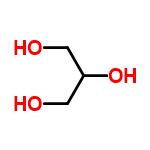

In [ ]:
csmol.status

'Complete'

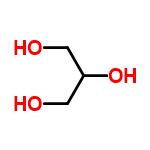

In [ ]:
csmol[0]

In [ ]:
csmol[0].record_id

733

In [ ]:
csmol[0].smiles

'C(C(CO)O)O'

In [ ]:
csmol[0].image

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x96\x00\x00\x00\x96\x08\x06\x00\x00\x00<\x01q\xe2\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x06&IDATx^\xed\xdd-L\x1cM\x18\xc0qB\x10H\x04\x02\x81\xc0\x94 \t\nQ\x81\x03I\x1d\x92\xa4\x06\x89\xa8\xc0\xa1\x1a$\xa6\x04\x89\xa8@\x92*$\x12\xd3\x04I\xaapE"*0\x84}\xe7\xb9\xdb\xb9\x0e\xdb\xdd\xbb\x99g\xef\xd9\x0f\xde\xff/\xd9\x94\xde\x07\xd7d\xfe\xd9\xbd\x9b\xdb\x9d\xced\x80\x01\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t\xc2\x82\t}X\xdf\xbe\xb9g\xbb\xa7\xcb\xf6\xf3g~c\x81\xbf_\xb62?~d\xd9\xe7\xcfo\x1

In [ ]:
ids = [i.csid for i in csmol]
ids

[733]

In [ ]:
deats = cs.get_details(csmol[0].csid)
deats

{'averageMass': 92.0938,
 'commonName': 'glycerin',
 'dataSourceCount': 171,
 'formula': 'C_{3}H_{8}O_{3}',
 'id': 733,
 'mol2D': '\n  ACD/Labs04281713412D\n\n  6  5  0  0  0  0  0  0  0  0  1 V2000\n    0.0000   -2.3040    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.3299   -2.3040    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9948   -1.1537    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.3247   -1.1537    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.3299    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0  0  0  0\n  2  3  1  0  0  0  0\n  3  4  1  0  0  0  0\n  3  5  1  0  0  0  0\n  5  6  1  0  0  0  0\nM  END\n',
 'mol3D': '753\n  Marvin  12300703363D          \n\n 14 13  0  0  0  0            999 V2000\n   -0.6817   -1.0887    1.0714 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.8050   -1.7788   -0.1100 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.1873   

In [ ]:
cs.get_details_batch(#, ['smiles', 'MonoisotopicMass', 'CommonName','DataSourceCount', 'Mol2D'])

NameError: ignored

In [ ]:
deats.keys()
cs_deats =str("CS_"+k) for k in deats}
cs_deats

['CS_id',
 'CS_smiles',
 'CS_formula',
 'CS_averageMass',
 'CS_molecularWeight',
 'CS_monoisotopicMass',
 'CS_nominalMass',
 'CS_commonName',
 'CS_referenceCount',
 'CS_dataSourceCount',
 'CS_pubMedCount',
 'CS_rscCount',
 'CS_mol2D',
 'CS_mol3D']

In [ ]:
extrainfo = cs.get_external_references(csmol[0].csid)

In [ ]:
extrainfo

In [ ]:
all_datasources = cs.get_datasources()
all_datasources

In [ ]:
a = pd.DataFrame({'A':[False,False,True],
                  'B':[False,True,True],
                  'Flag':[False,False,False]})


In [ ]:
newflag=a.A.copy()


In [ ]:
a.Flag = (a.B | newflag)
a.Flag

0    False
1     True
2     True
Name: Flag, dtype: bool

In [ ]:
id2 = cs.filter_name(df['Compound name'])

In [ ]:
cs.filter_status(id2)
cs2 = cs.filter_results(id2)

In [ ]:
cs2

[184821, 388877]

In [ ]:
def get_query_ids(df):
  Qid_dict_temp = {}
  for i in df.index:
    if type(df.InChIKey[i]) == float:
        pass
    elif len(df.InChIKey[i]) > 0 :
      try:
        Qid_dict[i] = cs.filter_inchikey(df.InChIKey[i])
      except chemspipy.errors.ChemSpiPyError:
          print(chemspipy.errors.ChemSpiPyError)
          print(i)
          time.sleep(5)
    else:
      try:
        Qid_dict[i] = cs.filter_name(df['Compound name'][i])
      except chemspipy.errors.ChemSpiPyError:
          print(chemspipy.errors.ChemSpiPyError)
          print(i)
          time.sleep(5)
          Qid_dict[i] = 'flag'
  return Qid_dict

Qid_dict = get_query_ids(df)

Qid_dict

{0: 'e391d984-d963-4d51-9a6d-39b8fa82bbe2',
 1: '7b1ce8e0-d02e-41c0-a94e-7a5c9e67270c',
 2: '74fcfcf1-59b0-435f-bd63-67c138249409',
 3: 'cf8eb092-ca1c-4bc5-903a-5bb9f65670ab',
 4: '7ab25d73-bf4e-4f77-8ae7-2ff586c8664b',
 5: '24d221df-ad91-458d-9022-f0dd29171805',
 6: '39bc9246-9570-4550-ba2a-f3b4dcfe1990',
 7: '8da5b167-88aa-4b57-a587-c3658b09c8a8',
 8: 'f0da32cc-570f-4e72-b5db-bc5edb7f6a5e',
 9: 'd6247888-8f0a-4f0c-88c7-72ef15533ab3',
 10: '23d0d09b-4c85-47a1-9e48-12861bf3a541',
 11: '8120a0aa-cd6c-4771-bc22-95b6e91e5240',
 12: 'c9e6f344-eeb5-4f00-be67-b8d0cc03141d',
 13: '6e53cce7-421b-4401-824f-0b0fbc3a2243',
 14: '51401b12-ec76-41a3-a906-ef557aa92d99',
 100: '5eaec8df-3350-414a-872c-5ca3a444160c',
 101: '68ddfca7-d53f-416e-9744-12c8639a73c8',
 102: '9ca9ec75-faac-48de-90b6-9468cc4f7c0e',
 103: 'dbe09ead-a677-442c-9d51-9e3ab97c8d1a',
 104: '0af1b9c5-adab-47bd-8712-023368e70a42',
 105: '1d89600f-9a44-4b1c-9999-e12f91a2d1a1',
 106: '7cf466e8-8519-4df2-b7bf-66ad6113bfba',
 107: 'dcc59a

In [ ]:
Qid_dict

{0: 'e391d984-d963-4d51-9a6d-39b8fa82bbe2',
 1: '7b1ce8e0-d02e-41c0-a94e-7a5c9e67270c',
 2: '74fcfcf1-59b0-435f-bd63-67c138249409',
 3: 'cf8eb092-ca1c-4bc5-903a-5bb9f65670ab',
 4: '7ab25d73-bf4e-4f77-8ae7-2ff586c8664b',
 5: '24d221df-ad91-458d-9022-f0dd29171805',
 6: '39bc9246-9570-4550-ba2a-f3b4dcfe1990',
 7: '8da5b167-88aa-4b57-a587-c3658b09c8a8',
 8: 'f0da32cc-570f-4e72-b5db-bc5edb7f6a5e',
 9: 'd6247888-8f0a-4f0c-88c7-72ef15533ab3',
 10: '23d0d09b-4c85-47a1-9e48-12861bf3a541',
 11: '8120a0aa-cd6c-4771-bc22-95b6e91e5240',
 12: 'c9e6f344-eeb5-4f00-be67-b8d0cc03141d',
 13: '6e53cce7-421b-4401-824f-0b0fbc3a2243',
 14: '51401b12-ec76-41a3-a906-ef557aa92d99',
 100: '5eaec8df-3350-414a-872c-5ca3a444160c',
 101: '68ddfca7-d53f-416e-9744-12c8639a73c8',
 102: '9ca9ec75-faac-48de-90b6-9468cc4f7c0e',
 103: 'dbe09ead-a677-442c-9d51-9e3ab97c8d1a',
 104: '0af1b9c5-adab-47bd-8712-023368e70a42',
 105: '1d89600f-9a44-4b1c-9999-e12f91a2d1a1',
 106: '7cf466e8-8519-4df2-b7bf-66ad6113bfba',
 107: 'dcc59a

In [ ]:
def get_query_results(Qid_dict):
  res_dict = {}
  for i in Qid_dict.keys():
    if cs.filter_status(Qid_dict[i])['status'] == 'Complete':
      time.sleep(5)
      res_dict[i] = cs.filter_results(Qid_dict[i])
    else:
      time.sleep(4)
      pass
  return res_dict


results_dict = get_query_results(Qid_dict)

results_dict

ChemSpiPyRateError: ignored

In [ ]:


for i in Qid_dict.keys():
  if i in res_dict.keys():
    pass
  else:
    res_dict[i] = 'none'
  while res_dict[i] == 'none':
    try:
      status = cs.filter_status(Qid_dict[i])['status']
    except chemspipy.errors.ChemSpiPyError:
      print(chemspipy.errors.ChemSpiPyError)
      print(i)
      time.sleep(5)
    if status == 'Complete':
      try:
        res_dict[i] = cs.filter_results(Qid_dict[i])
      except chemspipy.errors.ChemSpiPyError:
        print(chemspipy.errors.ChemSpiPyError)
        print(i)
        time.sleep(5)

    else:
      pass



In [ ]:
for i in Qid_dict.keys():
  if i in res_dict.keys():
    pass
  else:
    res_dict[i] = 'none'

res_dict

In [ ]:
res_dict

In [ ]:
for i in res_dict.keys():
  if type(res_dict[i]) == list:
    print(i,*res_dict[i])
  else:
    print(i, res_dict[i])

In [ ]:
for i in res_dict.keys():
  ids = res_dict[i]
  if len(ids) <1 :
    pass
  else:
    id = res_dict[i][0]
  df['CSIDs'][i] = id
df

In [ ]:
df[:10]

In [ ]:
for i in df.index:
  if type(df.InChIKey[i]) == float:
    print('naan')
    pass
  elif len(df.InChIKey[i]) > 0 :
    try:
     print('ok')
    except:
      pass



In [ ]:
name = 'lithocholic acid'
name_strip = name.replace(' ','')
print(name, name_strip)

lithocholic acid lithocholicacid


In [ ]:
c = cs.search('3-Hydroxy-L-proline', order='~chempipy.api.DATASOURCE_COUNT', raise_errors=True)

In [ ]:
print(c.status)
print(c[0].csid)

Complete
132893


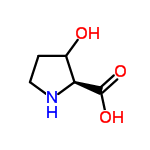

In [ ]:
c[0]


In [ ]:
c[0].external_references


In [ ]:
df = Compound_Puller(CompoundTab.SmilesCode[:5])


In [ ]:
sm_result = cs.convert(CompoundTab.SmilesCode[0], 'SMILES', 'InchI')

In [ ]:
mol = cs.convert()

In [ ]:
mol_result = cs.convert("InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(2,3)4/h8H,5-6H2,1-4H3",'InChI', 'Mol')

In [ ]:

print(mol_result)

OpenBabel04222118002D

 14 13  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  3  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  3  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  5  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

In [ ]:
ac = cs.get_details(21243783)

In [ ]:
ac

{'averageMass': 203.2356,
 'commonName': 'Acetylcarnitine',
 'dataSourceCount': 42,
 'formula': 'C_{9}H_{17}NO_{4}',
 'id': 21243783,
 'mol2D': 'LS-17075\n                      \n\n 14 13  0     0  0  0  0  0  0999 V2000\n   -2.1666   -2.2458    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5208   -2.6208    0.0000 C   0  0  3  0  0  0  0  0  0  0  0  0\n   -0.8708   -2.2458    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.2208   -2.6208    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.4250   -2.2458    0.0000 O   0  5  0  0  0  0  0  0  0  0  0  0\n   -0.2208   -3.3708    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5208   -3.3667    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.1666   -3.7375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.1666   -4.4875    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.8179   -3.3614    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.1666   -1.5000    0.0000 N   0  3  3  0  0  0  0  0  0  0  0  

In [ ]:


Mols = [cs.MolFromSmiles(str(i)) for i in smiles]
print(max(sms), min(sms))




AttributeError: ignored

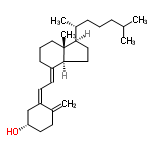

In [ ]:
c[0]

In [ ]:
c.monoisotopic_mass

AttributeError: ignored

In [ ]:
img = c.image
img

AttributeError: ignored

In [ ]:
x = open('imagetest.png', 'w')


In [ ]:
x.write(str(img))

NameError: ignored

In [ ]:
x.close

<function TextIOWrapper.close>

In [ ]:
df = pd.DataFrame(columns=['Monoisotopic_Mass', 'Image', 'Image_URL'])
di = {}

In [ ]:

s = pd.Series({'Monoisotopic_Mass' : c.monoisotopic_mass,
               'Image' : c.image,
               'Image_URL' : c.image_url
              }, name = c.common_name)
s


AttributeError: ignored

In [ ]:
df.loc[c.common_name] = s
df

NameError: ignored

In [ ]:
#search can rerur Created, Failed, Unknown, Suspended, Complete.


def Compound_Puller(smiles):    #takes SMILES or names as list
    cs = ChemSpider('bqQaG2wiLGYre44EyrEFUjVn3RWuHPFm')

    mass_list = pd.DataFrame(columns=['Search_Term',
                                      'SMILES',
                                      'Molecular_Formula',
                                      'Monoisotopic_Mass',
                                      'Nominal_Mass',
                                      'Image_URL',
                                      #'Image'
                                     ],
                             dtype = str)


    for sm in smiles:
        results = cs.search(sm)

        results.wait()



        if results.status == 'Complete':

            c = results[0]



            c_data = pd.Series({'Search_Term': sm,
                                'SMILES': c.smiles,
                                'Molecular_Formula' : c.molecular_formula,
                                'Monoisotopic_Mass' : c.monoisotopic_mass,
                                'Nominal_Mass' : c.nominal_mass,
                                'Image_URL' : c.image_url,
                               # 'Image' : c.image
                               },

                               name = c.common_name)


            mass_list.loc[c.common_name] = c_data




        elif results.status != 'Failed':
            if len(results)>1:
                c = results[0]

            c_error =  pd.Series({'Search_Term': sm,
                                  'SMILES': 'Error',
                                  'Molecular_Formula' : 'Error',
                                  'Monoisotopic_Mass' : 'Error',
                                  'Nominal_Mass' : 'Error',
                                  'Image_URL' : 'Error',
                                 # 'Image' : 'Error'
                                 },

                                 name = str('search for {0}'.format(sm)))


            mass_list.loc['search for {0}'.format(sm)] = c_error
        else:
            return 'PRO-blem'
            break





    return mass_list




In [ ]:
testlist = ['CS(=O)CCC(N)C(O)=O',
'N[CH](CCCNC(N)=N)C(O)=O',
'N[CH](CCC(N)=O)C(O)=O',
'N[CH](CO)C(O)=O',
'N[CH](CC1=CN=CN1)C(O)=O']

testnames = ['DL-Methionine sulfoxide',
             'L-Arginine',
             'L-Glutamine',
             'Serine',
             'L-Histidine']
a = cs.search(testnames[0])
a.wait()

for comp in a:
    print comp.smiles, comp.monoisotopic_mass, comp.common_name

SyntaxError: ignored

In [ ]:
df = Compound_Puller(testnames)

NameError: ignored

In [ ]:
df.to_csv('testfile001.csv')

In [ ]:
df_test = pd.read_csv('testfile001.csv')

In [ ]:
df_test

,Unnamed: 0,Search_Term,SMILES,Monoisotopic_Mass,Image_URL
0,methionine S-oxide,DL-Methionine sulfoxide,CS(=O)CCC(C(=O)O)N,165.045959,http://www.chemspider.com/ImagesHandler.ashx?i...
1,L-(+)-Arginine,L-Arginine,C(C[C@@H](C(=O)O)N)CNC(=N)N,174.111679,http://www.chemspider.com/ImagesHandler.ashx?i...
2,L-(+)-glutamine,L-Glutamine,C(CC(=N)O)[C@@H](C(=O)O)N,146.069138,http://www.chemspider.com/ImagesHandler.ashx?i...
3,DL-Serine,Serine,C(C(C(=O)O)N)O,105.042595,http://www.chemspider.com/ImagesHandler.ashx?i...
4,L-Histidine,L-Histidine,c1c(nc[nH]1)C[C@@H](C(=O)O)N,155.069473,http://www.chemspider.com/ImagesHandler.ashx?i...


## Final Test!

In [ ]:
MarcoList = pd.read_csv('181113_Standards_10ppm.csv')

MarcoList.head()

FileNotFoundError: ignored

In [ ]:
MarcoList.ChemName.head()

0     D-Allose
1    Galactose
2      Glucose
3    D-Mannose
4      Taurine
Name: ChemName, dtype: object

In [ ]:
MarcoList.ChemName.tail()

62      Taurodeoxycholic Acid (sodium salt)
63       O-Acetyl-L-carnitine hydrochloride
64                   Dopamine hydrochloride
65    alpha-Ketoglutaric acid disodium salt
66                         Sodium-L-lactate
Name: ChemName, dtype: object

In [ ]:
Final_df = Compound_Puller(MarcoList.ChemName)

Obtaining  Compound(92408) D-(+)-Allose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(5814) D-Galactopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(5589) D-Glucopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(17893) D-Mannopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(1091) Taurine
...with exact mass: 125.014664
done./n/n
Obtaining  Compound(6031) L-(-)-Asparagine
...with exact mass: 132.053497
done./n/n
Obtaining  Compound(824) methionine S-oxide
...with exact mass: 165.045959
done./n/n
Obtaining  Compound(6082) L-(+)-Arginine
...with exact mass: 174.111679
done./n/n
Obtaining  Compound(5746) L-(+)-glutamine
...with exact mass: 146.069138
done./n/n
Obtaining  Compound(597) DL-Serine
...with exact mass: 105.042595
done./n/n
Obtaining  Compound(6038) L-Histidine
...with exact mass: 155.069473
done./n/n
Obtaining  Compound(9367) L-Citrulline
...with exact mass: 175.095688
done./n/n
Obtaining  Compound(200

In [ ]:
Final_df

,Search_Term,SMILES,Molecular_Formula,Monoisotopic_Mass,Nominal_Mass,Image_URL
D-(+)-Allose,D-Allose,C([C@H]([C@H]([C@H]([C@H](C=O)O)O)O)O)O,C_{6}H_{12}O_{6},180.063385,180,http://www.chemspider.com/ImagesHandler.ashx?i...
D-Galactopyranose,Galactose,C([C@@H]1[C@@H]([C@@H]([C@H](C(O1)O)O)O)O)O,C_{6}H_{12}O_{6},180.063385,180,http://www.chemspider.com/ImagesHandler.ashx?i...
D-Glucopyranose,Glucose,C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O,C_{6}H_{12}O_{6},180.063385,180,http://www.chemspider.com/ImagesHandler.ashx?i...
D-Mannopyranose,D-Mannose,C([C@@H]1[C@H]([C@@H]([C@@H](C(O1)O)O)O)O)O,C_{6}H_{12}O_{6},180.063385,180,http://www.chemspider.com/ImagesHandler.ashx?i...
Taurine,Taurine,C(CS(=O)(=O)O)N,C_{2}H_{7}NO_{3}S,125.014664,125,http://www.chemspider.com/ImagesHandler.ashx?i...
L-(-)-Asparagine,L-Asparagine,C([C@@H](C(=O)O)N)C(=O)N,C_{4}H_{8}N_{2}O_{3},132.053497,132,http://www.chemspider.com/ImagesHandler.ashx?i...
methionine S-oxide,DL-Methionine sulfoxide,CS(=O)CCC(C(=O)O)N,C_{5}H_{11}NO_{3}S,165.045959,165,http://www.chemspider.com/ImagesHandler.ashx?i...
L-(+)-Arginine,L-Arginine,C(C[C@@H](C(=O)O)N)CNC(=N)N,C_{6}H_{14}N_{4}O_{2},174.111679,174,http://www.chemspider.com/ImagesHandler.ashx?i...
L-(+)-glutamine,L-Glutamine,C(CC(=N)O)[C@@H](C(=O)O)N,C_{5}H_{10}N_{2}O_{3},146.069138,146,http://www.chemspider.com/ImagesHandler.ashx?i...
DL-Serine,Serine,C(C(C(=O)O)N)O,C_{3}H_{7}NO_{3},105.042595,105,http://www.chemspider.com/ImagesHandler.ashx?i...


In [ ]:
Final_df.head()

NameError: name 'Final_df' is not defined

In [ ]:
Final_df.to_csv('181113_10ppmSTDs_FullData.csv')

## Full List



In [ ]:
FullList = pd.read_csv('181113_Standards_First170.csv')
FullList

,Bezeichnung,ArtikelNr,ChemName
0,A316,285005,D-Allose
1,G123,G0750,Galactose
2,G124,G8270,Glucose
3,M225,M0020,D-Mannose
4,C251,C9625,L-Carnosine
5,T230,T0625,Taurine
6,A253,A0884,L-Asparagine
7,M224,64430,DL-Methionine sulfoxide
8,A252,A5131,L-Arginine
9,G121,G3126,L-Glutamine


In [ ]:
FinalOut = Compound_Puller(FullList.ChemName)

Obtaining  Compound(92408) D-(+)-Allose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(5814) D-Galactopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(5589) D-Glucopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(17893) D-Mannopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(388363) L-Carnosine
...with exact mass: 226.106583
done./n/n
Obtaining  Compound(1091) Taurine
...with exact mass: 125.014664
done./n/n
Obtaining  Compound(6031) L-(-)-Asparagine
...with exact mass: 132.053497
done./n/n
Obtaining  Compound(824) methionine S-oxide
...with exact mass: 165.045959
done./n/n
Obtaining  Compound(6082) L-(+)-Arginine
...with exact mass: 174.111679
done./n/n
Obtaining  Compound(5746) L-(+)-glutamine
...with exact mass: 146.069138
done./n/n
Obtaining  Compound(597) DL-Serine
...with exact mass: 105.042595
done./n/n
Obtaining  Compound(6038) L-Histidine
...with exact mass: 155.069473
done./n/n
Obtaining  Compound(93

In [ ]:
FinalOut

'PRO-blem'

In [ ]:
lngstr = """Obtaining  Compound(92408) D-(+)-Allose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(5814) D-Galactopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(5589) D-Glucopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(17893) D-Mannopyranose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(388363) L-Carnosine
...with exact mass: 226.106583
done./n/n
Obtaining  Compound(1091) Taurine
...with exact mass: 125.014664
done./n/n
Obtaining  Compound(6031) L-(-)-Asparagine
...with exact mass: 132.053497
done./n/n
Obtaining  Compound(824) methionine S-oxide
...with exact mass: 165.045959
done./n/n
Obtaining  Compound(6082) L-(+)-Arginine
...with exact mass: 174.111679
done./n/n
Obtaining  Compound(5746) L-(+)-glutamine
...with exact mass: 146.069138
done./n/n
Obtaining  Compound(597) DL-Serine
...with exact mass: 105.042595
done./n/n
Obtaining  Compound(6038) L-Histidine
...with exact mass: 155.069473
done./n/n
Obtaining  Compound(9367) L-Citrulline
...with exact mass: 175.095688
done./n/n
Obtaining  Compound(200) DL-Threonine
...with exact mass: 119.058243
done./n/n
Obtaining  Compound(5764) D-(&minus;)-Fructose
...with exact mass: 180.063385
done./n/n
Obtaining  Compound(730) Glycine
...with exact mass: 75.032028
done./n/n
Obtaining  Compound(843) DL-Lysine
...with exact mass: 146.10553
done./n/n
Obtaining  Compound(753) Histamine
...with exact mass: 111.079643
done./n/n
Obtaining  Compound(83182) 88ZH74L7SR
...with exact mass: 161.068802
done./n/n
Obtaining  Compound(582) DL-Alanine
...with exact mass: 89.047676
done./n/n
Obtaining  Compound(1072) Spermine
...with exact mass: 202.215744
done./n/n
Obtaining  Compound(1121) DL-TYROSINE
...with exact mass: 181.073898
done./n/n
Obtaining  Compound(58633) L-3-nitrotyrosine
...with exact mass: 226.058975
done./n/n
Obtaining  Compound(802) Hydroxyproline
...with exact mass: 131.058243
done./n/n
Obtaining  Compound(62461) L-4-hydroxy-proline
...with exact mass: 131.058243
done./n/n
Obtaining  Compound(594) DL-Proline
...with exact mass: 115.063332
done./n/n
Obtaining  Compound(853) DL-Methionine
...with exact mass: 149.051056
done./n/n
Obtaining  Compound(969) DL-Phenylalanine
...with exact mass: 165.078979
done./n/n
Obtaining  Compound(1148) DL-Valine
...with exact mass: 117.078979
done./n/n
Obtaining  Compound(823) Kynurenine
...with exact mass: 208.084793
done./n/n
Obtaining  Compound(1057) Sarcosine
...with exact mass: 89.047676
done./n/n
Obtaining  Compound(259) Butyric acid
...with exact mass: 88.052429
done./n/n
Obtaining  Compound(1116) DL-Tryptophan
...with exact mass: 204.089874
done./n/n
Obtaining  Compound(769) DL-Isoleucine
...with exact mass: 131.094635
done./n/n
Obtaining  Compound(834) Leucine
...with exact mass: 131.094635
done./n/n
Obtaining  Compound(9734) Glycocholic acid
...with exact mass: 465.309052
done./n/n
Obtaining  Compound(395250) Prostaglandin D2
...with exact mass: 352.224976
done./n/n
Obtaining  Compound(4446202) prostaglandin F2alpha 1-ethanolamide
...with exact mass: 397.282837
done./n/n
Obtaining  Compound(17216015) Tauroursodeoxycholic acid
...with exact mass: 499.296753
done./n/n
Obtaining  Compound(4446243) (5Z,11alpha,13E,15S)-11,15-Dihydroxy-N-(2-hydroxyethyl)-9-oxoprosta-5,13-dien-1-amide
...with exact mass: 395.267181
done./n/n
Obtaining  Compound(106373) Taurine hyodeoxycholate
...with exact mass: 499.296753
done./n/n
Obtaining  Compound(4446261) PhD
...with exact mass: 370.235535
done./n/n
Obtaining  Compound(4444062) (+)-Prostaglandin F2alpha
...with exact mass: 354.240631
done./n/n
Obtaining  Compound(192176) cholic acid
...with exact mass: 408.287567
done./n/n
Obtaining  Compound(4444059) (-)-Prostaglandin E2
...with exact mass: 352.224976
done./n/n
Obtaining  Compound(2299354) Glycodeoxycholic acid
...with exact mass: 449.314117
done./n/n
Obtaining  Compound(2863) Decanoic acid
...with exact mass: 172.146332
done./n/n
Obtaining  Compound(388820) Lithocholic acid taurine conjugate
...with exact mass: 483.301849
done./n/n
Obtaining  Compound(7888) Undecylic acid
...with exact mass: 186.161987
done./n/n
Obtaining  Compound(9728) chenodeoxycholic acid
...with exact mass: 392.292664
done./n/n
Obtaining  Compound(193196) Deoxycholic acid
...with exact mass: 392.292664
done./n/n
Obtaining  Compound(29131) Ursodeoxycholic acid
...with exact mass: 392.292664
done./n/n
Obtaining  Compound(3756) 1160N9NU9U
...with exact mass: 200.177628
done./n/n
Obtaining  Compound(103116) b-D-Glucopyranosiduronic acid, (3a,5b)-24-[(carboxymethyl)amino]-24-oxocholan-3-yl
...with exact mass: 433.319214
done./n/n
Obtaining  Compound(4446908) Hyodeoxycholic acid
...with exact mass: 392.292664
done./n/n
Obtaining  Compound(12013) Tridecylic acid
...with exact mass: 214.193283
done./n/n
Obtaining  Compound(4446510) N-arachidonoylglycine
...with exact mass: 361.261688
done./n/n
Obtaining  Compound(10539) 0I3V7S25AW
...with exact mass: 228.208923
done./n/n
Obtaining  Compound(4509) Palmitylethanolamide
...with exact mass: 299.28244
done./n/n
Obtaining  Compound(473410) 14-Pentadecenoic acid
...with exact mass: 240.208923
done./n/n
Obtaining  Compound(4446566) 889DYX0816
...with exact mass: 323.28244
done./n/n
Obtaining  Compound(4445241) Anandamide
...with exact mass: 347.28244
done./n/n
Obtaining  Compound(4446571) N-(4Z,7Z,10Z,13Z,16Z,19Z)-docosahexaenoylethanolamine
...with exact mass: 371.28244
done./n/n
Obtaining  Compound(13249) pentadecanoic acid
...with exact mass: 242.224579
done./n/n
Obtaining  Compound(4517636) 7OVH75512R
...with exact mass: 354.277008
done./n/n
Obtaining  Compound(393216) Palmitoleic acid
...with exact mass: 254.224579
done./n/n
Obtaining  Compound(4446574) Oleoylethanolamide
...with exact mass: 325.298065
done./n/n
Obtaining  Compound(4444437) Alpha-Linolenic acid
...with exact mass: 278.224579
done./n/n
Obtaining  Compound(9519) Lithocholic acid
...with exact mass: 376.29776
done./n/n
Obtaining  Compound(960) Palmitic Acid
...with exact mass: 256.240234
done./n/n
Obtaining  Compound(25958) Stearoylethanolamide
...with exact mass: 327.313721
done./n/n
Obtaining  Compound(4471859) 10-heptadecenoic acid
...with exact mass: 268.240234
done./n/n
Obtaining  Compound(4444105) Linoleic acid
...with exact mass: 280.240234
done./n/n
Obtaining  Compound(82599) 7-OXOCHOLESTEROL
...with exact mass: 400.334137
done./n/n
Obtaining  Compound(393183) Docosahexaenoic acid
...with exact mass: 328.240234
done./n/n
Obtaining  Compound(553123) Elaidic Acid
...with exact mass: 282.25589
done./n/n
Obtaining  Compound(58604) 767JTD2N31
...with exact mass: 402.349792
done./n/n
Obtaining  Compound(4444554) doxercalciferol
...with exact mass: 412.334137
done./n/n
Obtaining  Compound(5091) Stearic acid
...with exact mass: 284.271515
done./n/n
Obtaining  Compound(197489) 3UQ9PF5XBD
...with exact mass: 402.349792
done./n/n
Obtaining  Compound(4445895) 11-Eicosenoic acid
...with exact mass: 310.28717
done./n/n
Obtaining  Compound(10035) Arachidic acid
...with exact mass: 312.302826
done./n/n
Obtaining  Compound(4941283) 123R6KJQ51
...with exact mass: 394.323578
done./n/n
Obtaining  Compound(4471979) (13Z,16Z)-docosadienoic acid
...with exact mass: 336.302826
done./n/n
Obtaining  Compound(4444353) Cholecalciferol
...with exact mass: 384.339203
done./n/n
Obtaining  Compound(4444351) Ergocalciferol
...with exact mass: 396.339203
done./n/n
Obtaining  Compound(388662) Desmesterol
...with exact mass: 384.339203
done./n/n
Obtaining  Compound(4444561) Erucic acid
...with exact mass: 338.318481
done./n/n
Obtaining  Compound(5775) Cholesterol
...with exact mass: 386.354858
done./n/n
Obtaining  Compound(7923) behenic acid
...with exact mass: 340.334137
done./n/n
Obtaining  Compound(4444352) Stigmasterol
...with exact mass: 412.370514
done./n/n
Obtaining  Compound(4444565) Nervonic acid
...with exact mass: 366.349792
done./n/n
Obtaining  Compound(192962) Sitosterol
...with exact mass: 414.386169
done./n/n
Obtaining  Compound(216175) Lanosterin
...with exact mass: 426.386169
done./n/n
Obtaining  Compound(553635) Squalene
...with exact mass: 410.391266
done./n/n
Obtaining  Compound(7822666) 1,2-Dioleoyl-sn-glycerol
...with exact mass: 620.537964
done./n/n
Obtaining  Compound(215725) ZR4D53AD57
...with exact mass: 624.584534
done./n/n
Obtaining  Compound(17215980) cholesteryl linoleate
...with exact mass: 648.584534
done./n/n
Obtaining  Compound(4980154) Cholesteryl arachidonate
...with exact mass: 672.584534
done./n/n
Obtaining  Compound(23621026) CHOLESTERYL HEPTADECANOATE
...with exact mass: 638.600159
done./n/n
Obtaining  Compound(9483859) 1H3NGP56NB
...with exact mass: 832.752014
done./n/n
Obtaining  Compound(17339243) SODIUM ASPARTATE MONOHYDRATE
...with exact mass: 173.030014
done./n/n
Obtaining  Compound(58163821) O-adipoyl-L-carnitine
...with exact mass: 289.152527
done./n/n
Obtaining  Compound(2015691) Acetyl-L-Carnitine Hydrochloride
...with exact mass: 239.092438
done./n/n"""

In [ ]:
cmps = lngstr.split('Compound(')

In [ ]:
potential_compounds = [i.split(')')[0] for i in cmps[1:]]

In [ ]:
potential_compounds

['92408',
 '5814',
 '5589',
 '17893',
 '388363',
 '1091',
 '6031',
 '824',
 '6082',
 '5746',
 '597',
 '6038',
 '9367',
 '200',
 '5764',
 '730',
 '843',
 '753',
 '83182',
 '582',
 '1072',
 '1121',
 '58633',
 '802',
 '62461',
 '594',
 '853',
 '969',
 '1148',
 '823',
 '1057',
 '259',
 '1116',
 '769',
 '834',
 '9734',
 '395250',
 '4446202',
 '17216015',
 '4446243',
 '106373',
 '4446261',
 '4444062',
 '192176',
 '4444059',
 '2299354',
 '2863',
 '388820',
 '7888',
 '9728',
 '193196',
 '29131',
 '3756',
 '103116',
 '4446908',
 '12013',
 '4446510',
 '10539',
 '4509',
 '473410',
 '4446566',
 '4445241',
 '4446571',
 '13249',
 '4517636',
 '393216',
 '4446574',
 '4444437',
 '9519',
 '960',
 '25958',
 '4471859',
 '4444105',
 '82599',
 '393183',
 '553123',
 '58604',
 '4444554',
 '5091',
 '197489',
 '4445895',
 '10035',
 '4941283',
 '4471979',
 '4444353',
 '4444351',
 '388662',
 '4444561',
 '5775',
 '7923',
 '4444352',
 '4444565',
 '192962',
 '216175',
 '553635',
 '7822666',
 '215725',
 '17215980',
 

In [ ]:

details_batch_test = cs.get_details_batch(potential_compounds[:99])



In [ ]:
details_batch_test

In [ ]:
details_batch_test_1 = cs.get_details_batch(potential_compounds[99:])

In [ ]:
details_batch_test_1

[{'averageMass': 239.6965,
  'commonName': 'Acetyl-L-Carnitine Hydrochloride',
  'dataSourceCount': 69,
  'formula': 'C_{9}H_{18}ClNO_{4}',
  'id': 2015691,
  'mol2D': '\n  ACD/Labs04281710492D\n\n 16 14  0  0  1  0  0  0  0  0  2 V2000\n    0.0000   -4.7046    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.2909   -4.7046    0.0000 N   0  3  0  0  0  0  0  0  0  0  0  0\n    1.2909   -3.4137    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.2909   -5.9955    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8400   -4.7046    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.6145   -3.3563    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.4957   -2.7157    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n    4.7428   -4.0066    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    5.8616   -3.3563    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    6.9804   -4.0066    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.8616   -2.0654    0.0000 O   0  0  0  0  0  0 

In [ ]:
for i in df.index:
  Q = 'flag'
  if i in Qid_dict_temp.keys():
    pass
  else:
    Qid_dict_temp[i]= Q
  if type(df.InChIKey[i]) == float:
      pass
  elif len(df.InChIKey[i]) > 1 :
    try:
      Q = cs.filter_inchikey(df.InChIKey[i])
      Q.wait()
    except chemspipy.errors.ChemSpiPyError:
        print(chemspipy.errors.ChemSpiPyError)
        print(i)
        time.sleep(5)

  else:
    try:
      Q = cs.filter_name(df['Compound name'][i])
      Q.wait()
    except chemspipy.errors.ChemSpiPyError:
        print(chemspipy.errors.ChemSpiPyError)
        print(i)
        time.sleep(5)
  if 'flag' in Qid_dict_temp[i]:
    pass
  else:
    Qid_dict_temp[i] = Q




In [ ]:

count = 0
for i in Qid_dict_temp.keys():
  if Qid_dict_temp[i] == 'flag':
    count+=1
print(len(df), len(Qid_dict_temp), count)

361 361 361


In [ ]:
import asyncio

In [ ]:
async def get_Q_name(name):
  QID = cs.filter_name(name)
  await asyncio.sleep(2)
  return QID

async def get_Q_inchikey(inchikey):
  QID = cs.filter_inchikey(inchikey)
  await asyncio.sleep(2)
  return QID

async def check_Q_status(QID):
  status = cs.filter_status(QID)
  await asyncio.sleep(2)
  return status

async def get_results(QID):
  results = cs.filter_results(QID)
  await asyncio.sleep(2)
  return results

async def generate_queries(df):
  try:
    len(qdict.keys())
  except NameError:
    qdict = {}
    print("no dictionary initialized - started from scratch")
  for i in df.index:
    try:
      if type(df.InChIKey[i]) == float:
        pass
      elif len(df.InChIKey[i]) > 1 :
        Q = asyncio.create_task(get_Q_inchikey(df.InChIKey[i]))
      else:
        Q = asyncio.create_task(get_Q_name(df['Compound name'][i]))
    except chemspipy.errors.ChemSpiPyError:
        #print(chemspipy.errors.ChemSpiPyError)
        Q = 'flag'
    qdict[i] = Q

  if len(qdict.keys() == len(df.index)):
    return qdict


async def main():
  qdict = {}

  task1 = asyncio.create_task(cs.filter_name(name)))

  qid = await task1

  task2





SyntaxError: ignored

In [ ]:
CSIDs = df.CSIDs.copy()
for i in CSIDs:
  if type(i) != str:

    print(i,type(i))

In [ ]:
CSIDs = df.CSIDs.copy().astype(str)

for i in df.index:
  c = CSIDs[i]
  if len(c) > 1 and c != 'nan':
    continue
  else:
    name = df['Compound name'][i].replace(' ','')
    csid = cs.search(name)
    csid.wait()
    if csid.status == 'Complete':
      CSIDs[i] = csid
      print(name, csid)
      time.sleep(9)
    else:
      time.sleep(10)






D-(-)-3-Phosphoglycericacid Results([])
1-1(Z)-Hexadecenyl-2-Palmitoyl-sn-glycero-3-PC Results([])
1,2-dipalmitelaidoyl-sn-glycero-3-phosphocholine Results([])
PCC16-20:4(1-O-hexadecyl-2-arachidonoyl-sn-glycero-3-phosphocholine) Results([])
PC(18:0/18:0),1,2-Distearoyl-sn-glycero-3-phosphocholine Results([])
24:0PC1,2-dilignoceroyl-sn-glycero-3-phosphocholine Results([])
Phosphatidylethanolamine(L-α-Cephalin) Results([])
ProstaglandinD2 Results([])
ProstaglandinE2 Results([Compound(4444059)])
ProstaglandinF2alpha Results([Compound(4444062)])
ThromboxaneB2 Results([Compound(4446261)])
ProstaglandinF2alphaEthanolamide Results([])
formicacid Results([])
Aceticacid Results([Compound(60259), Compound(63512), Compound(67055), Compound(67902), Compound(505045)])
butyricacid Results([])
Iso-butyricacid Results([])
Iso-valericacid Results([])
Hexanoicacid Results([Compound(8552)])
Propionicacid Results([])
Cortisone Results([Compound(193441)])
5-Dihydrocortisone Results([Compound(58997)])
Corti

KeyboardInterrupt: ignored

In [ ]:
done = {}

for i in df.index:
  a = df.CSIDs[i]
  b = CSIDs[i]

  if a == b:
    continue
  elif b == 'nan':
    continue
  else:
    done[i] = b
    print(a,b)

len(done)

  Results([Compound(2300116), Compound(21403175), Compound(29790019), Compound(32820244), Compound(34448634), Compound(35032598)])
nan Results([Compound(28533412), Compound(30776708), Compound(35032598)])
nan Results([Compound(110274)])
nan Results([Compound(28540385)])
nan Results([])
nan Results([Compound(8420677)])
nan Results([])
nan Results([])
nan Results([])
nan Results([Compound(448), Compound(67868749)])
nan Results([Compound(28639188)])
nan Results([Compound(4945564), Compound(21403150), Compound(30776566), Compound(67155050)])
nan Results([Compound(743)])
nan Results([])
nan Results([Compound(243), Compound(75635)])
nan Results([Compound(758), Compound(12126)])
nan Results([Compound(10607921)])
nan Results([Compound(389029)])
nan Results([Compound(802), Compound(5605)])
nan Results([Compound(566), Compound(72365)])
nan Results([Compound(312567)])
nan Results([Compound(491986)])
nan Results([Compound(780), Compound(27473565)])
nan Results([Compound(451)])
nan Results([])
nan 

203

In [ ]:
for i in df.index:
  print(i, df.CSIDs[i], len([i]))

0 28540385 1
1 21243783 1
2 nan 1
3 8420677 1
4 nan 1
5 nan 1
6 2300116 1
7 nan 1
8 nan 1
9 110274 1
10 28533412 1
11 4945564 1
12 28639188 1
13   1
14 448 1
15 nan 1
16 nan 1
17 nan 1
18 nan 1
19 nan 1
20 nan 1
21 nan 1
22 nan 1
23 nan 1
24 nan 1
25 nan 1
26 80508 1
27 nan 1
28 566 1
29 813 1
30 743 1
31 758 1
32 nan 1
33 802 1
34 389029 1
35 nan 1
36 nan 1
37 nan 1
38 nan 1
39 nan 1
40 nan 1
41 nan 1
42 nan 1
43 312567 1
44 491986 1
45 nan 1
46 58633 1
47 nan 1
48 nan 1
49 nan 1
50 10607921 1
51 61452 1
52 nan 1
53 nan 1
54 582 1
55 227 1
56 nan 1
57 nan 1
58 234 1
59 nan 1
60 nan 1
61 nan 1
62 718 1
63 30572 1
64 nan 1
65 nan 1
66 nan 1
67 843 1
68 853 1
69 969 1
70 594 1
71 597 1
72 nan 1
73 1116 1
74 1121 1
75 nan 1
76 58780533 1
77 nan 1
78 nan 1
79 nan 1
80 nan 1
81 nan 1
82 nan 1
83 nan 1
84 nan 1
85 nan 1
86 nan 1
87 nan 1
88 nan 1
89 nan 1
90 nan 1
91 nan 1
92 nan 1
93 nan 1
94 nan 1
95 nan 1
96 22563 1
97 2241 1
98 nan 1
99 nan 1
100 nan 1
101 nan 1
102 nan 1
103 8537 1
104 

In [ ]:
for i in df.index:
  c = CSIDs[i]
  if len(c) > 1 and c != 'nan':
    continue
  else:
    name = df['Compound name'][i].replace(' ','')
    csid = cs.search(name)
    csid.wait()
    if csid.status == 'Complete':
      CSIDs[i] = csid
      print(name, csid)
      time.sleep(9)
    else:
      time.sleep(10)


D-Fructose6-phosphate Results([])
Ribose Results([Compound(5575), Compound(81643), Compound(390205), Compound(393389), Compound(394477), Compound(4470639), Compound(5341884), Compound(5341885), Compound(5408961), Compound(9150858), Compound(9183270), Compound(9979598), Compound(10194213), Compound(21230436)])
Xylose Results([Compound(5805), Compound(85957), Compound(111589), Compound(119104), Compound(388606), Compound(392301), Compound(393406), Compound(559198), Compound(5381968), Compound(9063342), Compound(9128906), Compound(9564380), Compound(9695892), Compound(10466741)])
Fucose Results([Compound(16190), Compound(2299091)])
D-Allose Results([Compound(92408), Compound(388604), Compound(395203), Compound(2299155), Compound(10254579), Compound(10254580), Compound(20017462)])
Fructose Results([Compound(5764), Compound(22728), Compound(388309), Compound(388644), Compound(388775), Compound(389447), Compound(2006057), Compound(4573712), Compound(4937931), Compound(8329822), Compound(9281

In [ ]:
df

,Compound name,Number,Abbreviation,CAS numbers of purchased compounds,optional CSID number,Class,Sum formula (activeCompound),Exact mass (monoisotopic MW),Weighed portion [mg],Volume [ml],comments - please write in English,beta (activeCompound in stock solution) [mg/l],Provider,Dissolved in,calc_MonoMass,smiles,SMILES,InChI,InChIKey,Mol,calc_logP,calc_pKa,CSIDs,CS_SMILES,CS_imageURL,CS_details,CS_LogP,CS_pKa,Q1 pos,Q1 neg,pos,neg,checked by Franz,sort order in original list,Flag
0,Acetyl Carnitine,A319,AC-C2,5080-50-2,NaN,Acyl-Carnitines,C9H17NO4,203.115759,13.4,13.4,NaN,#REF!,Sima-Aldrich,50% ACN,203.115758,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,RDHQFKQIGNGIED-UHFFFAOYSA-N,NaN,-1.2357,NaN,NaN,NaN,http://www.chemspider.com/ImagesHandler.ashx?i...,http://www.chemspider.com/ImagesHandler.ashx?i...,-0.489,NaN,204.1,248.116,[M+H]+,[M+FA]-,OK,sort002,False
1,Propionyl Carnitine,P239,AC-C3,20064-19-1,NaN,Acyl-Carnitines,C10H19NO4,217.131409,1.368,1.368,"am 14.7.2020 neu hergestellt, weil Lösung vers...",1000,Sima-Aldrich,iPropOH,217.131408,CCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C10H19NO4/c1-5-10(14)15-8(6-9(12)13)7...,UFAHZIUFPNSHSL-UHFFFAOYSA-N,NaN,-0.8456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.101,262.1,[M+H]+,[M+FA]-,OK,sort014,False
2,Butyryl Carnitine,B146,AC-C4,25576-40-3,NaN,Acyl-Carnitines,C11H21NO4,231.147059,1.152,1.152,NaN,1000,Sima-Aldrich,iPropOH,231.147058,CCCC(=O)O[C@H](CC([O-])=O)C[N+](C)(C)C,CCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C11H21NO4/c1-5-6-11(15)16-9(7-10(13)1...,QWYFHHGCZUCMBN-SECBINFHSA-N,NaN,-0.4555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.101,"230.1, 276.1",[M+H]+,"[M-H]-, [M+FA]-",OK,sort003,False
3,Tiglyl Carnitine,T236,AC-C4:1(C2-Me),?,NaN,Acyl-Carnitines,C12H21NO4,243.147059,10.8,10.8,NaN,#REF!,CaymanChemicals,50% ACN,243.147058,C/C=C(\C)/C(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,C/C=C(\C)C(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C12H21NO4/c1-6-9(2)12(16)17-10(7-11(1...,WURBQCVBQNMUQT-OLKPEBQYSA-N,NaN,-0.2894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.201,288.147,[M+H]+,[M+FA]-,OK,sort017,False
4,Valeryl Carnitine,V029,AC-C5,67-97-0,NaN,Acyl-Carnitines,C12H23NO4,245.162709,11.4,11.4,NaN,1000,CaymanChemicals,100% iPrOH,245.162708,CCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,CCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,InChI=1S/C12H23NO4/c1-5-6-7-12(16)17-10(8-11(1...,VSNFQQXVMPSASB-SNVBAGLBSA-N,NaN,-0.0654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.2,290.163,[M+H]+,[M+FA]-,OK,sort019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Sucrose,S104,SUG-Sucrose,57-50-1,NaN,Sugars,C12H22O11,342.116215,13.24,13.24,NaN,NaN,sigma,50% ACN,342.116212,OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...,OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...,InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(2...,CZMRCDWAGMRECN-UGDNZRGBSA-N,NaN,-5.3956,NaN,5768,NaN,NaN,NaN,NaN,NaN,360.1,"341.1, 387.1",[M+NH4]+,"[M-H]-, [M+FA]-",OK,sort353,False
357,Sialyllactose,S226,SUG-Sialyllactose,NaN,NaN,Sugars,C23H38NO19,633.211634,10.1,10.1,NaN,NaN,VWR,50% ACN,633.211628,CC(=O)N[C@@H]1[C@H](C[C@@](O[C@H]1[C@@H]([C@@H...,CC(=O)N[C@@H]1[C@@H](O)C[C@](O[C@H]2[C@@H](O)[...,InChI=1S/C23H39NO19/c1-7(29)24-13-8(30)2-23(22...,OIZGSVFYNBZVIK-FHHHURIISA-N,NaN,-8.3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634.2,632.2,[M+H]+,[M-H]-,OK,sort355,False
358,"1,3-Dipalmitoyl-2-oleoylglycerol",D229,"TG-C16,C18:1,C16",2190-25-2,NaN,Triglyceride,C53 H100 O6,832.751990,1.782,1.782,NaN,1000,Sima-Aldrich,iPrOH/Heptan 1:1,832.751991,CCCCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCCCC...,CCCCCCCC/C=C/CCCCCCCC(=O)OC(COC(=O)CCCCCCCCCCC...,InChI=1S/C53H100O6/c1-4-7-10-13-16-19-22-25-26...,FDCOHGHEADZEGF-OCEACIFDSA-N,NaN,16.9847,NaN,4715823,NaN,NaN,NaN,NaN,NaN,850.8,NaN,[M+NH4]+,NaN,OK,sort358,False
359,"1,2-Di(cis-9,12-octadecadienoyl)-3-hexadecanoy...",D271,"TG-C18:2,C18:2,C16",NaN,NaN,triglyceride,C55H98O

In [ ]:
newcols = pd.DataFrame(columns = ['csid', 'CSIDs', 'Flag'])
newcols.head()


,csid,CSIDs,Flag
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
for i in df.index[6:11]:
  print(str(i),df['Compound name'][i], type(df.CSIDs[i]), type(CSIDs[i]))

6 Glutaryl Carnitine <class 'str'> <class 'chemspipy.search.Results'>
7 2-Octenoyl Carnitine <class 'float'> <class 'chemspipy.search.Results'>
8 Octanoyl Carnitine <class 'float'> <class 'chemspipy.search.Results'>
9 Adipoyl Carnitine <class 'float'> <class 'chemspipy.search.Results'>
10 2-Decenoyl Carnitine <class 'float'> <class 'chemspipy.search.Results'>


In [ ]:
ResultsType = type(CSIDs[7])

In [ ]:

for i in df.index:
  newcols.Flag[i] = False
  res = CSIDs[i]
  if type(res) ==  ResultsType:
    newcols.CSIDs[i] = res
    if res.count > 0:
      newcols.csid[i] = res[0].csid
  elif type(res) == str and len(res)>=2 and res != 'nan':
    newcols.csid[i]

  else:
    newcols.Flag[i]=True


newcols

,csid,CSIDs,Flag
0,NaN,NaN,False
1,NaN,NaN,False
2,NaN,NaN,False
3,NaN,NaN,False
4,NaN,NaN,False
...,...,...,...
356,5768,(Compound(5768)),False
357,NaN,NaN,False
358,4715823,"(Compound(4715823), Compound(9483859))",False
359,NaN,NaN,True


In [ ]:
df.all_CSIDs = newcols.CSIDs
df.CSIDs = newcols.CSIDs

df.Flag = df.Flag |newcols.Flag

In [ ]:
df

NameError: ignored

In [ ]:
df.to_excel('/content/drive/MyDrive/BOKU/Thesis/Writting/ChromManuscript/Projekte_mirror/210422_Table1_DF_someCSIDs.xlsx')

In [ ]:
for i in df.index:
  res = df.CSIDs[i]
  if type(res) == ResultsType and res.count > 0:
    c = res[0]
    df.loc[i,'CS_details'] = cs.get_details(c.csid)
    break

In [ ]:
df

NameError: ignored